In [1]:
!pip install bertopic
!pip install kaleido

In [17]:
from datasets import load_dataset

from sentence_transformers import SentenceTransformer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance

from umap import UMAP

from sklearn.cluster import HDBSCAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Loading the arXiv abstracts dataset.

In [3]:
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

Instatiating an embedding model and generating the embeddings for each abstract.

In [4]:
embedding_model = SentenceTransformer("thenlper/gte-small")

embeddings = embedding_model.encode(abstracts)

Instantiating UMAP for dimensionality reduction and HDBSCAN for clustering the papers.

In [5]:
umap_model = UMAP(
    n_components=5,
    min_dist=0.0,
    metric='cosine',
)

hdbscan_model = HDBSCAN(
    min_cluster_size=100,
    metric="euclidean",
    cluster_selection_method="eom"
)

Creating a BERTopic pipeline with the previous models.

In [6]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model
).fit(abstracts, embeddings)

Printing the information about each topic.

In [7]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13618,-1_the_of_and_to,"[the, of, and, to, in, we, for, that, language...",[ While there is a large body of research stu...
1,0,2769,0_dialogue_dialog_response_the,"[dialogue, dialog, response, the, to, and, res...",[ A Dialogue State Tracker (DST) is a key com...
2,1,2085,1_speech_asr_recognition_end,"[speech, asr, recognition, end, acoustic, the,...",[ Humans are capable of processing speech by ...
3,2,2011,2_question_qa_questions_answer,"[question, qa, questions, answer, answering, r...",[ Multi-hop question answering (QA) requires ...
4,3,1245,3_medical_clinical_biomedical_patient,"[medical, clinical, biomedical, patient, and, ...",[ There is an increasing interest in developi...


Looking closely to a specific topic.

In [8]:
topic_model.get_topic(3)

[('medical', np.float64(0.028762367037839007)),
 ('clinical', np.float64(0.026128881037557145)),
 ('biomedical', np.float64(0.017924044229532064)),
 ('patient', np.float64(0.011483207387484791)),
 ('and', np.float64(0.010961958028555333)),
 ('notes', np.float64(0.010378055416157347)),
 ('the', np.float64(0.010371505792521616)),
 ('of', np.float64(0.010084873574594172)),
 ('in', np.float64(0.009988209429112023)),
 ('for', np.float64(0.009417207339055244))]

Finding a topic which is close to ``transformers``.

In [9]:
idx = topic_model.find_topics('transformers')[0][0]

topic_model.get_topic(idx)

[('attention', np.float64(0.04666410744897091)),
 ('transformer', np.float64(0.03422278830594938)),
 ('transformers', np.float64(0.02008093604590092)),
 ('self', np.float64(0.01377061969626997)),
 ('heads', np.float64(0.012873138779998109)),
 ('long', np.float64(0.012697507179560759)),
 ('memory', np.float64(0.012234996229264345)),
 ('head', np.float64(0.012062636895610688)),
 ('the', np.float64(0.011080959000391908)),
 ('sequence', np.float64(0.010634113498671856))]

Visualizing the documents with an interative plot.

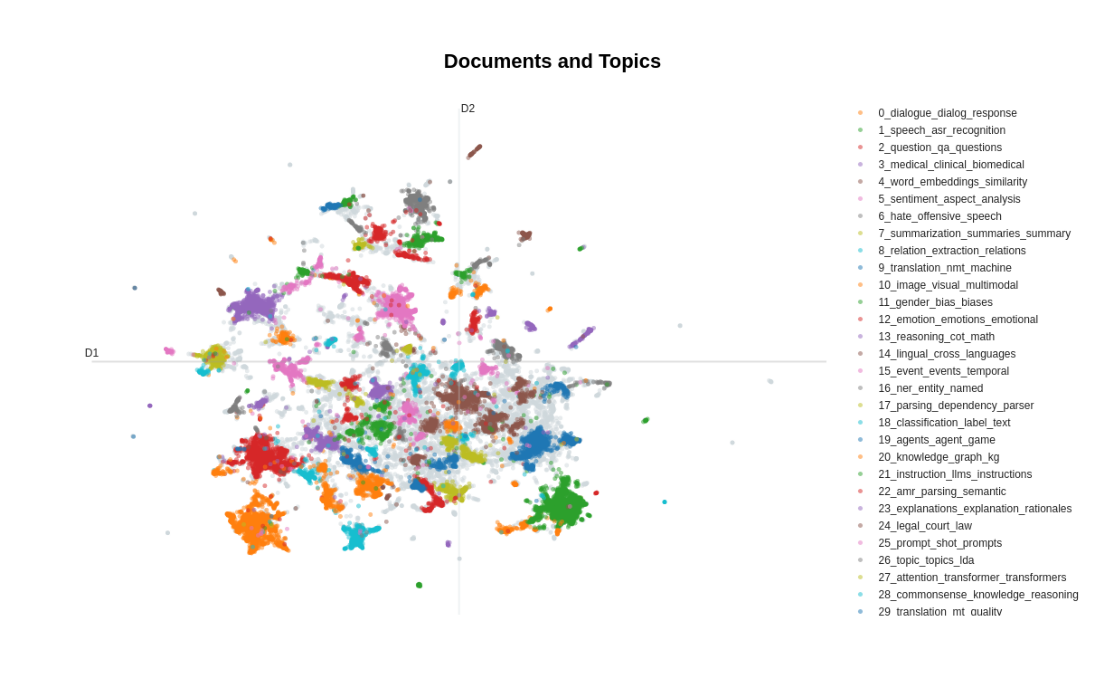

In [18]:
topic_model.visualize_documents(
    list(titles),
    embeddings=embeddings,
    width=1200,
    hide_annotations=True
)

img = mpimg.imread('newplot.png')
plt.figure(figsize=(14, 14))
plt.imshow(img)
plt.axis('off')
plt.show()

Ploting the most important words for each topic.

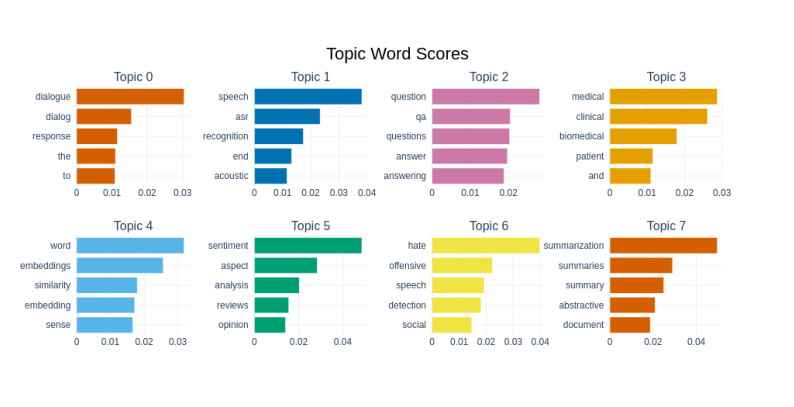

In [19]:
topic_model.visualize_barchart()

img = mpimg.imread('newplot(1).png')
plt.figure(figsize=(10, 14))
plt.imshow(img)
plt.axis('off')
plt.show()

Ploting the hierarquichal structure of the topics.

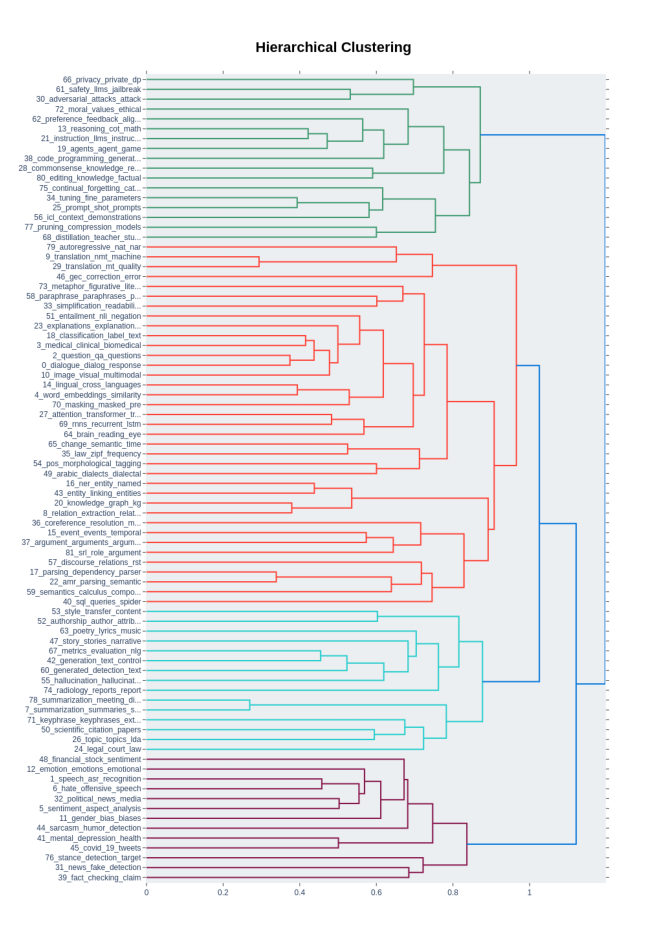

In [20]:
topic_model.visualize_hierarchy()

img = mpimg.imread('newplot(2).png')
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

Refining the topics with a representation model based on BERT.

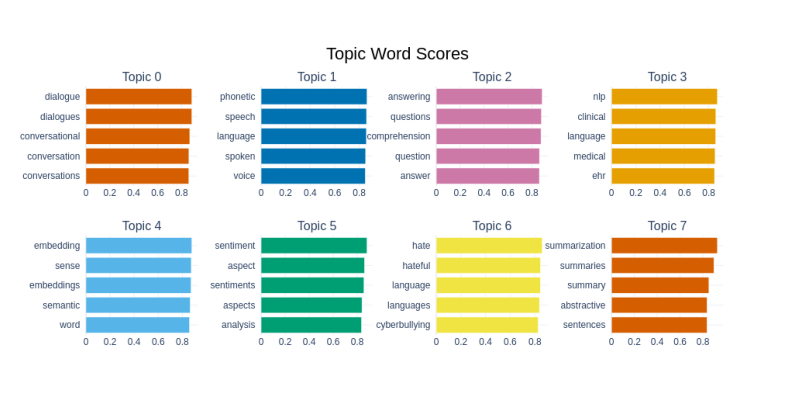

In [21]:
representation_model = KeyBERTInspired()
topic_model.update_topics(
    abstracts,
    representation_model=representation_model
)

topic_model.visualize_barchart()

img = mpimg.imread('newplot(3).png')
plt.figure(figsize=(10, 14))
plt.imshow(img)
plt.axis('off')
plt.show()

Further refinement with Maximal Marginal Relevance (MMR).

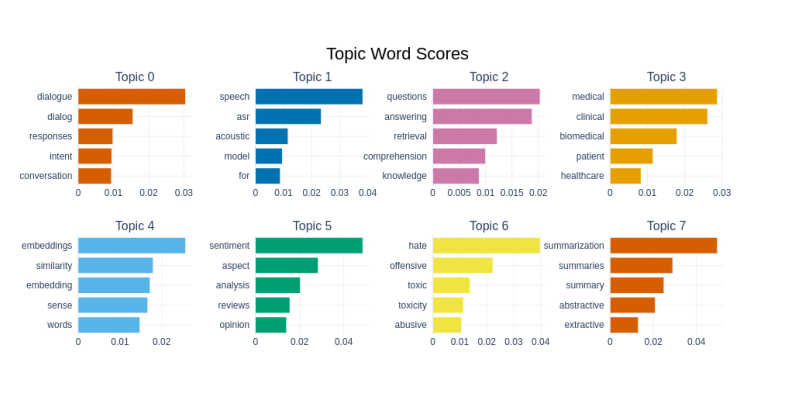

In [22]:
mmr_model = MaximalMarginalRelevance(diversity=0.1)
topic_model.update_topics(
    abstracts,
    representation_model=mmr_model
)

topic_model.visualize_barchart()

img = mpimg.imread('newplot(4).png')
plt.figure(figsize=(10, 14))
plt.imshow(img)
plt.axis('off')
plt.show()